In [1]:
# Importing Libraries
import numpy as np  
import pandas as pd 

# Import dataset
dataset = pd.read_csv(r'C:\Users\pierre youssef\Downloads\Restaurant_Reviews.tsv', delimiter='\t')


In [5]:
# Display settings to show full text in each column
pd.set_option('display.max_colwidth', None)

# Display the first 20 rows of the dataset
print(dataset.head(20))


                                                                                                             Review  \
0                                                                                          Wow... Loved this place.   
1                                                                                                Crust is not good.   
2                                                                         Not tasty and the texture was just nasty.   
3                           Stopped by during the late May bank holiday off Rick Steve recommendation and loved it.   
4                                                       The selection on the menu was great and so were the prices.   
5                                                                    Now I am getting angry and I want my damn pho.   
6                                                                             Honeslty it didn't taste THAT fresh.)   
7   The potatoes were like rubber and you could 

In [27]:
# Library to clean data
import re

# Natural Language Toolkit
import nltk 

nltk.download('stopwords')
nltk.download('wordnet')  # Download the WordNet resource for lemmatization

# To remove stopwords
from nltk.corpus import stopwords

# For Lemmatization
from nltk.stem import WordNetLemmatizer

# Initialize empty array to append clean text 
corpus = [] 

# Create a lemmatizer object
lemmatizer = WordNetLemmatizer()

# 1000 (reviews) rows to clean
for i in range(0, 1000): 
    
    # Column: "Review", row ith
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) 
    
    # Convert all cases to lower cases
    review = review.lower() 
    
    # Split to array (default delimiter is " ")
    review = review.split() 
    
    # Loop for lemmatizing each word in the string array at ith row    
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))] 
                
    # Rejoin all string array elements to create back into a string
    review = ' '.join(review)  
    
    # Append each string to create an array of clean text 
    corpus.append(review)   



[nltk_data] Downloading package stopwords to C:\Users\pierre
[nltk_data]     youssef\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\pierre
[nltk_data]     youssef\AppData\Roaming\nltk_data...


In [29]:
# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer

# To extract max 1500 feature.
# "max_features" is attribute to
# experiment with to get better results
cv = CountVectorizer(max_features = 1500) 

# X contains corpus (dependent variable)
X = cv.fit_transform(corpus).toarray() 

# y contains answers if review
# is positive or negative
y = dataset.iloc[:, 1].values 


In [31]:
# Splitting the dataset into
# the Training set and Test set
from sklearn.model_selection import train_test_split

# experiment with "test_size"
# to get better results
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)



In [33]:
# Fitting Random Forest Classification
# to the Training set
from sklearn.ensemble import RandomForestClassifier

# n_estimators can be said as number of
# trees, experiment with n_estimators
# to get better results 
model = RandomForestClassifier(n_estimators = 501,
                            criterion = 'entropy')
                            
model.fit(X_train, y_train) 


RandomForestClassifier(criterion='entropy', n_estimators=501)

In [35]:
# Predicting the Test set results
y_pred = model.predict(X_test)

y_pred


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 0, 1, 0], dtype=int64)

In [37]:
# Import the accuracy_score function
from sklearn.metrics import accuracy_score


# Calculate and print the accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.764


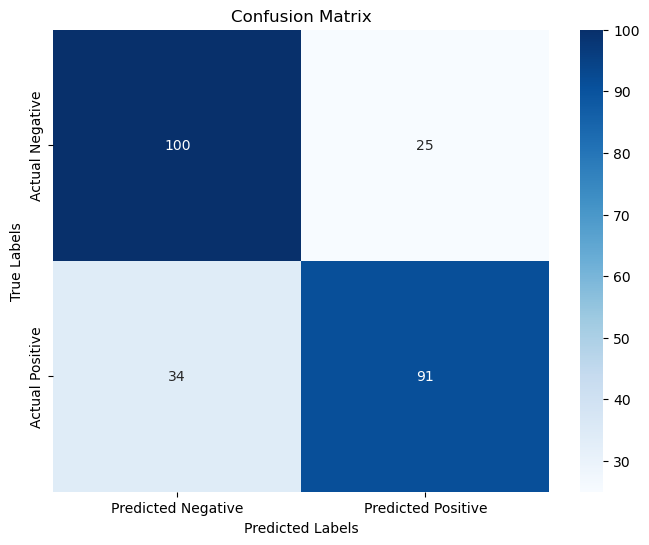

In [39]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are already defined
# Example: y_test = [0, 1, 0, 1], y_pred = [0, 0, 1, 1]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(8, 6))  # Set the figure size
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()